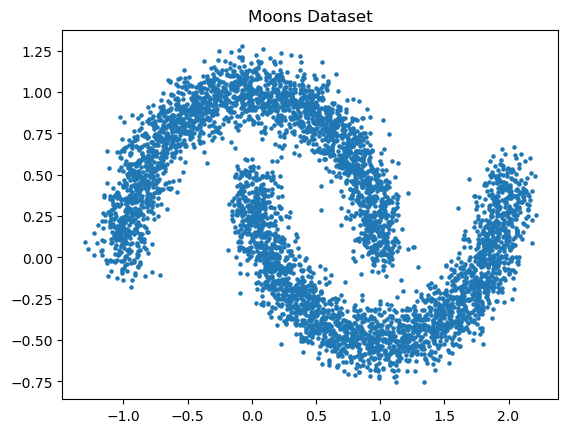

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import cdist
from queue import PriorityQueue

# Generate moons dataset
X, y = make_moons(n_samples=5000, noise=0.1, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Moons Dataset")
plt.show()


In [5]:


class HierarchicalClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]
        self.labels = np.arange(self.n_samples)
        self.distances = cdist(X, X)  # Pairwise distances between points

        pq = PriorityQueue()
        for i in range(self.n_samples):
            for j in range(i + 1, self.n_samples):
                pq.put((self.distances[i, j], i, j))

        # Perform hierarchical clustering
        while len(np.unique(self.labels)) > self.n_clusters:
            _, i, j = pq.get()
            self._merge_clusters(i, j)

    def _merge_clusters(self, i, j):
        self.labels[self.labels == self.labels[j]] = self.labels[i]
        self.n_samples -= 1

    def cut_tree(self, n_clusters):
        unique_labels = np.unique(self.labels)
        if n_clusters > len(unique_labels):
            raise ValueError("Cannot cut tree into more clusters than the number of distinct labels.")

        labels_sorted = sorted(unique_labels, key=lambda x: np.sum(self.labels == x), reverse=True)
        threshold_label = labels_sorted[n_clusters - 1]
        self.labels[self.labels > threshold_label] = threshold_label + 1

        return self.labels


# Run hierarchical clustering on moons dataset
hc = HierarchicalClustering(n_clusters=2)
hc.fit(X)
labels = hc.cut_tree(n_clusters=2)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5)
plt.title("Hierarchical Clustering Result (K=2)")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
